## 人脸识别
1. 人脸有不同的颜色组成
2. 不同的颜色由三原色：红绿蓝组成
3. 红绿蓝由0~255的数字组成

### 所以人脸是由数据组成的

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC

from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV,train_test_split

# lfw labeled face wild
from sklearn.datasets import fetch_lfw_people

In [11]:
faces = fetch_lfw_people(resize=1,min_faces_per_person=70)
faces

{'data': array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
          86.333336],
        [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
         185.33333 ],
        [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
         182.33333 ],
        ...,
        [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
          30.333334],
        [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
         127.333336],
        [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
          99.      ]], dtype=float32),
 'images': array([[[253.66667 , 253.66667 , 254.66667 , ...,  42.333332,
           37.666668,  39.      ],
         [254.      , 254.      , 253.66667 , ...,  43.333332,
           38.      ,  39.      ],
         [254.66667 , 254.33333 , 253.33333 , ...,  44.      ,
           38.666668,  38.      ],
         ...,
         [ 68.333336,  63.333332,  51.      , ...,  90.333336,
     

In [12]:
faces['data'].shape

(1288, 11750)

In [4]:
faces['data'].shape

(13233, 11750)

In [5]:
faces['images'].shape

(13233, 125, 94)

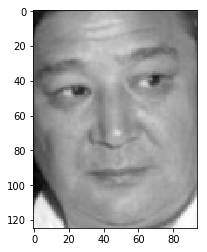

In [10]:
plt.imshow(faces['images'][1000],cmap = 'gray')

In [ ]:
# Ridge和Lasso 线性回归变种（正则化）

In [13]:
data = faces['data']
target = faces['target']
data.shape

(1288, 11750)

In [14]:
pca = PCA(n_components=300,whiten=True)

pca.fit(data)

data_pca = pca.transform(data)
# 从11750特征（像素）提取了300个关键的特征（高纬度-------->低维度）
data_pca.shape

(1288, 300)

In [16]:
data_pca

array([[ 0.1312758 ,  0.14904505,  0.51789874, ..., -0.10317919,
         0.27956337,  0.62110376],
       [ 0.9204071 , -0.80005   ,  0.6680634 , ..., -0.21706183,
         0.30054805, -0.01903324],
       [-0.69904125, -0.30689582, -0.86376435, ..., -1.8783903 ,
        -1.0919745 , -1.4500604 ],
       ...,
       [ 1.7497385 ,  0.39074925, -0.25402433, ..., -0.01421317,
        -1.7226801 ,  0.06981719],
       [-1.7680945 , -0.6549504 ,  0.77101004, ...,  2.6080534 ,
         0.48848894,  0.9157986 ],
       [ 0.54473245, -0.15662557,  0.6664113 , ...,  0.22716053,
        -0.34953785,  0.9092752 ]], dtype=float32)

In [15]:
data

array([[253.66667 , 253.66667 , 254.66667 , ...,  86.666664,  86.333336,
         86.333336],
       [ 42.      ,  34.      ,  31.666666, ..., 121.666664, 148.      ,
        185.33333 ],
       [ 94.      ,  72.      ,  74.      , ..., 182.66667 , 183.      ,
        182.33333 ],
       ...,
       [ 84.333336,  86.      ,  85.333336, ...,  44.      ,  35.666668,
         30.333334],
       [ 49.666668,  50.333332,  47.666668, ..., 178.66667 , 167.66667 ,
        127.333336],
       [ 31.333334,  33.333332,  26.666666, ...,  47.666668,  63.      ,
         99.      ]], dtype=float32)

In [17]:
5*2*4*5

200

In [18]:
c = [0.2,0.5,1,3,5]

kernel = ['rbf','poly']

degree = [1,3,5,7]

# If gamma is 'auto' then 1/n_features will be used instead.1/300 = 0.003
gamma = [0.001,0.003,0.005,0.01,0.1]
svc = SVC()

gCV = GridSearchCV(svc,param_grid={'C':c,'kernel':kernel,'degree':degree,'gamma':gamma})



In [19]:
%time gCV.fit(data_pca,target)

Wall time: 11min 39s


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.2, 0.5, 1, 3, 5], 'kernel': ['rbf', 'poly'], 'degree': [1, 3, 5, 7], 'gamma': [0.001, 0.003, 0.005, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [20]:
gCV.best_score_

0.782608695652174

In [21]:
gCV.best_params_

{'C': 5, 'degree': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [22]:
svc_best = gCV.best_estimator_

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test,faces_train,faces_test = train_test_split(data_pca,target,data,test_size = 100)

In [27]:
svc_best.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_ = svc_best.predict(X_test)

In [29]:
y_train

array([3, 3, 0, ..., 2, 6, 3], dtype=int64)

In [30]:
y_

array([4, 3, 2, 3, 3, 2, 6, 3, 3, 1, 3, 1, 4, 3, 6, 3, 1, 1, 3, 3, 6, 2,
       0, 3, 3, 5, 3, 4, 2, 6, 1, 3, 3, 3, 3, 3, 1, 2, 0, 4, 1, 6, 1, 3,
       2, 1, 3, 3, 3, 2, 2, 3, 3, 1, 6, 6, 3, 3, 3, 3, 5, 3, 1, 3, 1, 4,
       3, 3, 1, 6, 3, 3, 1, 3, 4, 3, 5, 3, 6, 3, 3, 1, 1, 3, 3, 6, 3, 3,
       1, 0, 3, 3, 4, 1, 3, 6, 5, 6, 3, 1], dtype=int64)

In [31]:
svc_best.score(X_test,y_test)

0.73

In [35]:
target_names = faces.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [33]:
y_test

array([4, 3, 3, 3, 3, 2, 6, 3, 3, 1, 3, 1, 4, 4, 6, 4, 1, 2, 3, 3, 1, 2,
       6, 3, 3, 5, 4, 4, 2, 6, 4, 3, 3, 3, 4, 4, 1, 2, 6, 4, 3, 6, 1, 3,
       1, 3, 3, 3, 1, 2, 2, 3, 3, 1, 6, 6, 2, 3, 3, 3, 5, 3, 1, 3, 3, 4,
       3, 3, 1, 6, 1, 3, 3, 3, 4, 3, 5, 3, 6, 5, 3, 5, 3, 1, 3, 2, 3, 3,
       3, 0, 3, 3, 4, 1, 0, 6, 5, 6, 3, 0], dtype=int64)

In [36]:
target_names[4]

'Gerhard Schroeder'

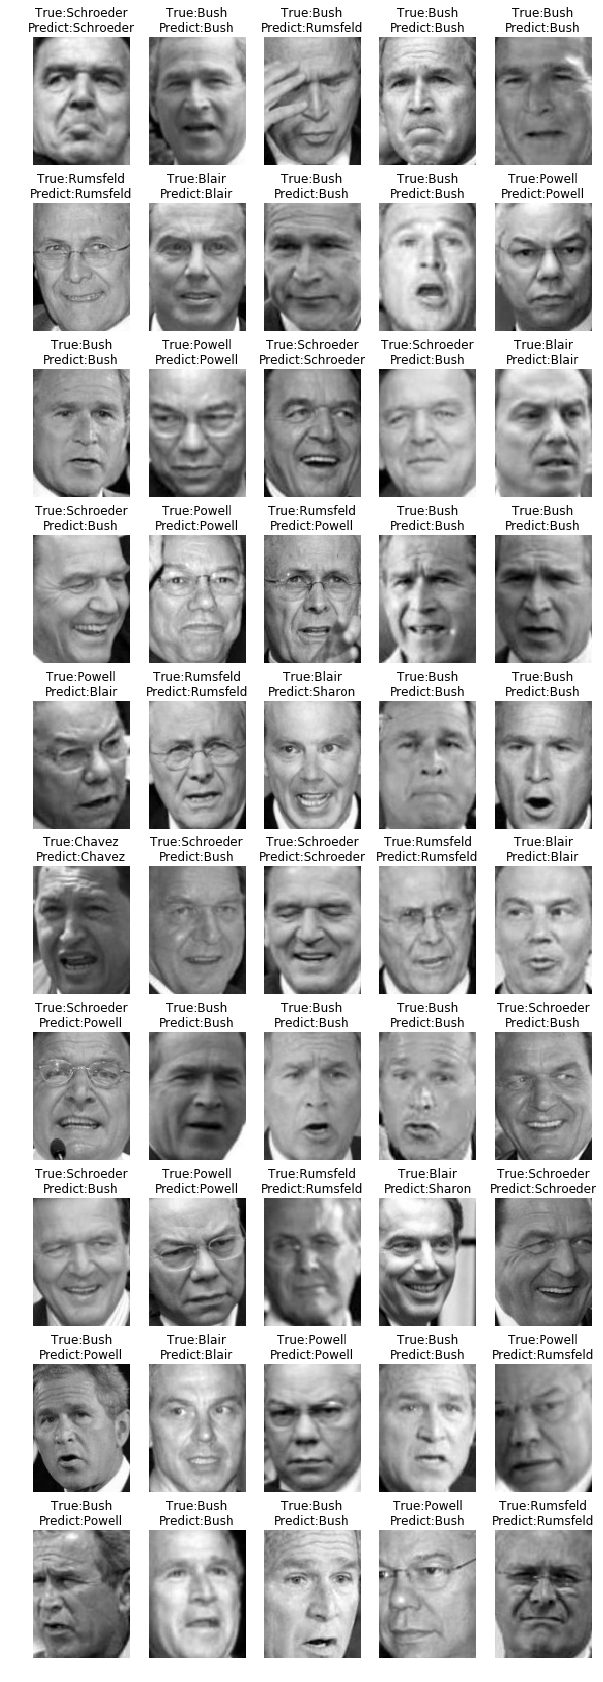

In [37]:
plt.figure(figsize=(5*2,10*3))
for i in range(50):
    
    axes = plt.subplot(10,5,i+1)
    
#     faces_test
    axes.imshow(faces_test[i].reshape(125,94),cmap = 'gray')
    axes.axis('off')
    
#     设置标题：True：Bush \n Preidict:Bush

#     t真实的 y_test
    t = target_names[y_test[i]].split(' ')[-1]
    
    p = target_names[y_[i]].split(' ')[-1]
    axes.set_title('True:%s\nPredict:%s'%(t,p))

In [39]:
# 为题：算法对数据预测，预测错误，很多预测成bush？？？
target.shape

(1288,)

In [41]:
np.argwhere(target == 0)

array([[   4],
       [   9],
       [  38],
       [  45],
       [  50],
       [  53],
       [  55],
       [  77],
       [ 102],
       [ 111],
       [ 137],
       [ 140],
       [ 145],
       [ 155],
       [ 191],
       [ 195],
       [ 246],
       [ 321],
       [ 391],
       [ 392],
       [ 404],
       [ 419],
       [ 435],
       [ 437],
       [ 440],
       [ 464],
       [ 465],
       [ 476],
       [ 491],
       [ 494],
       [ 498],
       [ 505],
       [ 512],
       [ 521],
       [ 575],
       [ 578],
       [ 602],
       [ 614],
       [ 633],
       [ 672],
       [ 692],
       [ 707],
       [ 720],
       [ 732],
       [ 742],
       [ 761],
       [ 767],
       [ 774],
       [ 794],
       [ 813],
       [ 817],
       [ 837],
       [ 853],
       [ 869],
       [ 877],
       [ 908],
       [ 924],
       [ 931],
       [ 934],
       [ 953],
       [ 968],
       [ 970],
       [ 984],
       [1012],
       [1034],
       [1045],
       [10

In [42]:
for i in range(7):
    
    num = np.argwhere(target == i).size
    name = target_names[i]
    print('%s图片数量是：%d'%(name,num))

Ariel Sharon图片数量是：77
Colin Powell图片数量是：236
Donald Rumsfeld图片数量是：121
George W Bush图片数量是：530
Gerhard Schroeder图片数量是：109
Hugo Chavez图片数量是：71
Tony Blair图片数量是：144


In [ ]:
# 作业：样本不均衡，样本量比较少的图片复制，变成530，再次进行训练和学习

### 使用matplotlib.pyplot导入数据图片并显示,观察这张图片的数据类型

## 进行人脸识别操作
1.导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、loggin等  


2.设置logging，控制台显示程序处理数据的进度  


3.使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地  


4.查看人脸数据结构  


5.从人脸数据中提取进行机器学习的关键数据  


6.对数据进行分割，获取训练数据和测试数据  


7.数据太复杂了，使用PCA对数据进行降维处理，去除一些不重要的数据  


8.使用GridSerchCV查询最佳的机器学习模型  


9.定义方法获取预测人名和真实人名  


10.定义方法绘制人脸识别结果图形  


11.调用方法进行数据展示  


导入相应模块工具：GridSearchCV、fetch_lfw_people、PCA、logging等 

设置logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')  
控制台输出记录数据，显示程序处理数据的进度

使用fetch_lfw_people导入数据，如果本地没有会从网络下载，如果本地有数据，加载本地

查看人脸数据结构

从人脸数据中提取进行机器学习的关键数据

分割训练数据和预测数据

使用PCA进行降维

使用GridSearchCV我们找到了最佳的支持向量机方法

进行数据预测

定义方法获取预测人名和真实人名 

调用方法获取人脸预测的名字，以及人脸的真实名字

定义方法绘制人脸识别结果图形

调用方法，显示数据

网络上查找图片使用机器学习模型进行预测

读取网络数据进行灰度处理gray = [0.299,0.587,0.114]  
如果是jpg图片进行归一化操作

如果图片尺寸不符合要求，那么修改尺寸